In [1]:
# import sys
# print(sys.executable)

In [2]:
# !/Users/amin/anaconda3/bin/python -m pip install install scikit_learn

In [3]:
# !pip3 install scikit_learn
# !pip3 install -U scikit-learn scipy matplotlib

In [4]:
# import eli5

In [5]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from tabulate import tabulate
import regex as re
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import learning_curve

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier

from nltk.corpus import stopwords

import pickle
import sys

import warnings
warnings.filterwarnings('ignore')
# warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [6]:
# df_reddit = pickle.load(open('../DataSet/df_reddit_for_model.pkl', 'rb'))
df_reddit = pickle.load(open('../DataSet/df_reddit_for_model.pkl', 'rb'))
EDA_df = pickle.load(open('../DataSet/EDA_all_for_model.pkl', 'rb'))
# df_reddit['target'] = df_reddit['subreddit'].replace({"NASA": 1, "Space_discussion": 0})
df_reddit.head(2)

,ent,text_merged,word_count*,sentiment_score*,target,polarity_score,polarity,polarity_VSA,lower_sent,tagged_sent,text_complexity
0,1.0,star shine saturn ring,4,0.0,1,0.0,1,1,star shine saturn ring,"[(star, NN), (shine, NN), (saturn, NN), (ring,...",92.80
1,2.0,smithsonian nation air space museum,5,0.0,1,0.0,1,1,smithsonian nation air space museum,"[(smithsonian, JJ), (nation, NN), (air, NN), (...",15.64


In [7]:
EDA_df.head(2)

,target,NN,JJ,VBZ,VBD,RB,VBN,JJR,NNS,VBP,...,EX,SYM,PDT,ent,word_count*,sentiment_score*,polarity_score,polarity,polarity_VSA,text_complexity
0,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,4,0.0,0.0,1,1,92.80
1,1,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,5,0.0,0.0,1,1,15.64


In [8]:
X = df_reddit['text_merged']
y = df_reddit['target']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    stratify=y,
                                                    random_state = 101)

In [9]:
cvec = CountVectorizer(min_df=4, max_df=1.0,
                       ngram_range=(1,2),max_features = 3000)

term_mat = cvec.fit_transform(df_reddit['text_merged'])

term_df = pd.DataFrame(term_mat.toarray(), 
                       columns=cvec.get_feature_names())

term_df.head(2)

,aa,ab,abil,abl,abl see,aboard,aboard intern,aboard space,abort,abort test,...,york,youlikebet,young,youtu,zealand,zero,zero graviti,zone,zoom,zubrin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# for col in term_df.columns:
#     if col == 'target':
#         print(col)
term_df = term_df.drop(columns = ['target'])

In [11]:
All_DF =  pd.concat([EDA_df, term_df], axis=1)
All_DF.head(2)

,target,NN,JJ,VBZ,VBD,RB,VBN,JJR,NNS,VBP,...,york,youlikebet,young,youtu,zealand,zero,zero graviti,zone,zoom,zubrin
0,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y2 = All_DF['target']
X2 = All_DF.drop(columns = ['target'])

X_arr2 = np.array(X2)
y_arr2 = np.array(y2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_arr2,
                                                        y_arr2,
                                                        test_size = 0.25,
                                                        random_state = 101)

### Hard voting

In [13]:
clf1 = LogisticRegression(solver='sag', max_iter=1000, n_jobs=-1)

clf2 = MLPClassifier(hidden_layer_sizes=50, activation='relu', solver='adam', 
                    alpha=0.0001, batch_size='auto', learning_rate='constant', 
                    learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
                    random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                    momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                    validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                    n_iter_no_change=10, max_fun=15000)

clf3 = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, 
                                    n_estimators=100, subsample=1.0, criterion='friedman_mse', 
                                    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                    max_depth=6, min_impurity_decrease=0.0, min_impurity_split=None, 
                                    init=None, random_state=None, max_features=None,
                                    max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, 
                                    n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)


eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], 
        voting='hard', n_jobs=-1, verbose=True)

eclf1 = eclf1.fit(X_arr2, y_arr2)
# print(eclf1.predict(X_arr2))

train score 0.9231111111111111
test score 0.921


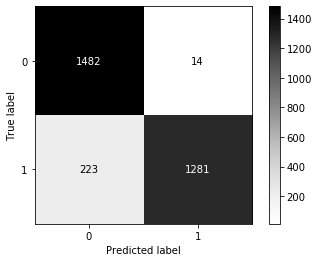

In [14]:
eclf1.score(X_train2, y_train2); 
print('train score', eclf1.score(X_train2, y_train2))

eclf1.score(X_test2, y_test2); 
print('test score', eclf1.score(X_test2, y_test2))

preds = eclf1.predict(X_test2)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test2, preds).ravel()

# View confusion matrix

plot_confusion_matrix(eclf1, X_test2, y_test2, 
                      cmap='Greys', values_format='d');
Accuracy = (tp + tn) / (tp + tn + fp + fn)
Precision = tp / (tp + fp)
Recall = tp / (tp + fn)

Accuracy, Precision, Recall
plt.savefig("../Figures/plot_04_03_1.png")

In [15]:
# save the model to disk
sys.path.insert(1, '../Codes/')
filename = '../Codes/Models/Hard_voting_All_DF_P04_03.sav'
pickle.dump(eclf1, open(filename, 'wb'))

### Soft voting

In [16]:
clf1 = LogisticRegression(solver='sag', max_iter=1000, n_jobs=-1)

clf2 = MLPClassifier(hidden_layer_sizes=50, activation='relu', solver='adam', 
                    alpha=0.0001, batch_size='auto', learning_rate='constant', 
                    learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
                    random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                    momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                    validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                    n_iter_no_change=10, max_fun=15000)

clf3 = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, 
                                    n_estimators=100, subsample=1.0, criterion='friedman_mse', 
                                    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                    max_depth=6, min_impurity_decrease=0.0, min_impurity_split=None, 
                                    init=None, random_state=None, max_features=None,
                                    max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, 
                                    n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)


eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], 
        voting='soft', n_jobs=-1, verbose=True)

eclf1 = eclf1.fit(X_arr2, y_arr2)
# print(eclf1.predict(X_arr2))

train score 0.9597777777777777
test score 0.9566666666666667


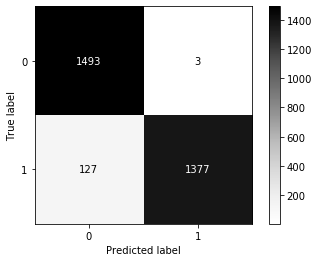

In [17]:
eclf1.score(X_train2, y_train2); 
print('train score', eclf1.score(X_train2, y_train2))

eclf1.score(X_test2, y_test2); 
print('test score', eclf1.score(X_test2, y_test2))

preds = eclf1.predict(X_test2)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test2, preds).ravel()

# View confusion matrix

plot_confusion_matrix(eclf1, X_test2, y_test2, 
                      cmap='Greys', values_format='d');
Accuracy = (tp + tn) / (tp + tn + fp + fn)
Precision = tp / (tp + fp)
Recall = tp / (tp + fn)

Accuracy, Precision, Recall
plt.savefig("../Figures/plot_04_03_2.png")

In [18]:
# save the model to disk
sys.path.insert(1, '../Codes/')
filename = '../Codes/Models/Soft_voting_All_DF_P04_03.sav'
pickle.dump(eclf1, open(filename, 'wb'))

Changing hyperparameters with more depth and iteration to see if it will affect the results.

In [13]:
clf1 = LogisticRegression(solver='sag', max_iter=2500, n_jobs=-1)

clf2 = MLPClassifier(hidden_layer_sizes=50, activation='relu', solver='adam', 
                    alpha=0.0001, batch_size='auto', learning_rate='constant', 
                    learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
                    random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                    momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                    validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                    n_iter_no_change=10, max_fun=15000)

clf3 = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, 
                                    n_estimators=150, subsample=1.0, criterion='friedman_mse', 
                                    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                    max_depth=5, min_impurity_decrease=0.0, min_impurity_split=None, 
                                    init=None, random_state=None, max_features=None,
                                    max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, 
                                    n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)


eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], 
        voting='soft', n_jobs=-1, verbose=True)

eclf1 = eclf1.fit(X_arr2, y_arr2)

train score 0.9587777777777777
test score 0.9563333333333334


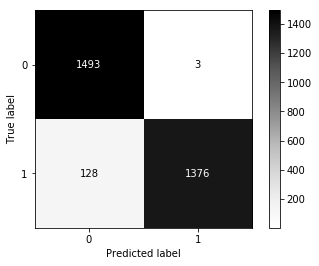

In [14]:
eclf1.score(X_train2, y_train2); 
print('train score', eclf1.score(X_train2, y_train2))

eclf1.score(X_test2, y_test2); 
print('test score', eclf1.score(X_test2, y_test2))

preds = eclf1.predict(X_test2)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test2, preds).ravel()

# View confusion matrix

plot_confusion_matrix(eclf1, X_test2, y_test2, 
                      cmap='Greys', values_format='d');
Accuracy = (tp + tn) / (tp + tn + fp + fn)
Precision = tp / (tp + fp)
Recall = tp / (tp + fn)

Accuracy, Precision, Recall
plt.savefig("../Figures/plot_04_03_3.png")

The final result is a Soft voting model including LogisticRegression, MLPClassifier, and GradientBoostingClassifier with almost 96% accuracy. The ALL data was used which is included countvectorized data along with EDA.

Here I make a dictionary of models along with data type which were used in part 4 of this study.

In [73]:
Model_details = {'model_names':['LogisticRegression','GradientBoostingClassifier','MLPClassifier',
                                'LogisticRegression','LogisticRegression', 'GradientBoostingClassifier',
                                'GradientBoostingClassifier','MLPClassifier','MLPClassifier',
                                'LogisticRegression','MLPClassifier','GradientBoostingClassifier',
                                'Hard_voting_lr_GB_MLP','Soft_voting_lr_GB_MLP','Soft_voting_lr_GB_MLP_different_HP'],
                 
                'data_set_used':['CountVectorizer','CountVectorizer','CountVectorizer',
                                 'EDA_df','EDA_df_normalized','EDA_df',
                                 'EDA_df_normalized','EDA_df','EDA_df_normalized',
                                 'All_DF','All_DF','All_DF',
                                 'All_DF','All_DF','All_DF'],
                 
                'accuracys':[0.756,0.736, 0.752,
                             0.82,0.832,0.831,
                             0.831, 0.824,0.832,
                             0.828,0.844,0.878,
                             0.921,0.954,0.959],
                 
                'TN':[1186,1288,1149,
                      1456,1496,1495,
                      1495,1470,1488,
                      1458,'nan','nan',
                      1481,1491,1493],
                 
                'FP':[310,208,347,
                      40,0,1,
                      1,26,8,
                      38,'nan','nan',
                      15,5,3],
                 
                'FN':[421,578,381,
                      495,504,504,
                      504,491,499,
                      476,'nan','nan',
                      220,101,128],
                 
                'TP':[1083,926,1123,
                      1009,1000,1000,
                      1000,1013,1005,
                      1028,'nan','nan',
                      1284,1403,1376]}

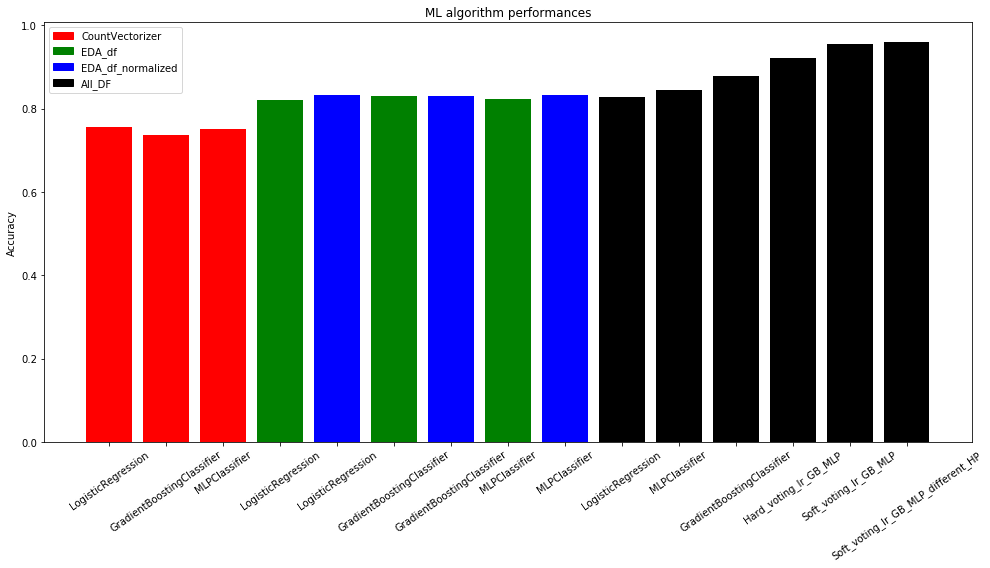

In [81]:
height = Model_details['accuracys']
bars = Model_details['model_names']

x_pos = np.arange(len(bars))

plt.figure(figsize=(14,8))

# Create bars
my_colors=['r','r','r', 
           'g', 'b','g', 'b', 'g', 'b',
           'k', 'k','k','k','k','k']

plt.bar(x_pos, height, color=my_colors)

# Create names on the x-axis

plt.xticks(x_pos, bars); plt.xticks(rotation = 35)
plt.title('ML algorithm performances'); plt.ylabel('Accuracy')

colors = {'CountVectorizer':'red', 'EDA_df':'green',
          'EDA_df_normalized':'blue', 'All_DF':'black'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.tight_layout()
plt.savefig("../Figures/plot_04_03_4.png"); plt.show()

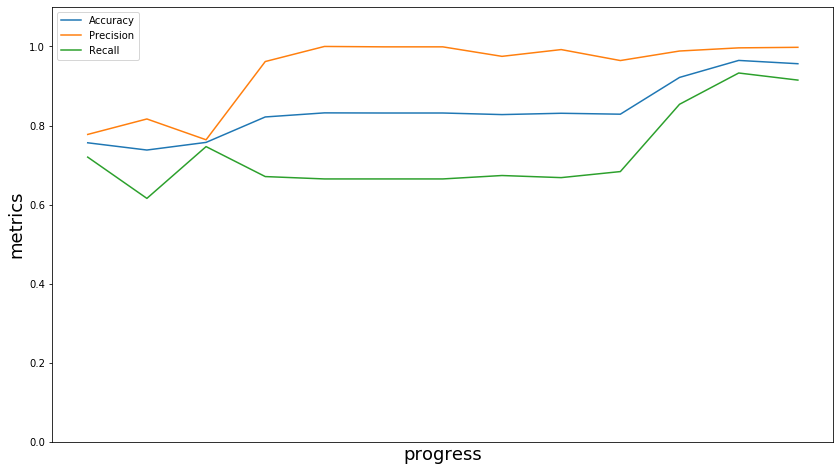

In [86]:
try:
    Accuracy = [((tp + tn) / (tp + tn + fp + fn)) for (tp,tn,fp,fn) in zip(Model_details['TP'],Model_details['TN'],
                                                                       Model_details['FP'],Model_details['FN'])]
    Precision = [(tp / (tp + fp)) for (tp,fp) in zip(Model_details['TP'],Model_details['FP'])]

    Recall = [(tp / (tp + fn)) for (tp,fn) in zip(Model_details['TP'],Model_details['FN'])]
except:
    pass


plt.figure(figsize=(14,8))
plt.plot(Accuracy, label='Accuracy')
plt.plot(Precision, label='Precision')
plt.plot(Recall, label='Recall')
plt.legend()
plt.ylim(0,1.1)
plt.ylabel('metrics', fontsize=18), plt.xlabel('progress', fontsize=18)
plt.tick_params(left = True, right = False , labelleft = True ,
                labelbottom = False, bottom = False)
plt.savefig("../Figures/plot_04_03_5.png"); plt.show()

In [88]:
Model_details_df = pd.DataFrame(Model_details)

In [92]:
Model_details_df

,model_names,data_set_used,accuracys,TN,FP,FN,TP
0,LogisticRegression,CountVectorizer,0.756,1186,310,421,1083
1,GradientBoostingClassifier,CountVectorizer,0.736,1288,208,578,926
2,MLPClassifier,CountVectorizer,0.752,1149,347,381,1123
3,LogisticRegression,EDA_df,0.820,1456,40,495,1009
4,LogisticRegression,EDA_df_normalized,0.832,1496,0,504,1000
5,GradientBoostingClassifier,EDA_df,0.831,1495,1,504,1000
6,GradientBoostingClassifier,EDA_df_normalized,0.831,1495,1,504,1000
7,MLPClassifier,EDA_df,0.824,1470,26,491,1013
8,MLPClassifier,EDA_df_normalized,0.832,1488,8,499,1005
9,LogisticRegression,All_DF,0.828,1458,38,476,1028


In [94]:
print(tabulate(Model_details_df, headers = 'keys', tablefmt = 'github'))

|    | model_names                        | data_set_used     |   accuracys |   TN |   FP |   FN |   TP |
|----|------------------------------------|-------------------|-------------|------|------|------|------|
|  0 | LogisticRegression                 | CountVectorizer   |       0.756 | 1186 |  310 |  421 | 1083 |
|  1 | GradientBoostingClassifier         | CountVectorizer   |       0.736 | 1288 |  208 |  578 |  926 |
|  2 | MLPClassifier                      | CountVectorizer   |       0.752 | 1149 |  347 |  381 | 1123 |
|  3 | LogisticRegression                 | EDA_df            |       0.82  | 1456 |   40 |  495 | 1009 |
|  4 | LogisticRegression                 | EDA_df_normalized |       0.832 | 1496 |    0 |  504 | 1000 |
|  5 | GradientBoostingClassifier         | EDA_df            |       0.831 | 1495 |    1 |  504 | 1000 |
|  6 | GradientBoostingClassifier         | EDA_df_normalized |       0.831 | 1495 |    1 |  504 | 1000 |
|  7 | MLPClassifier                      | ED